# Milestone 1

Annesa Fadhila Damayanti

Batch 11

## Objective
Buatlah model Classification untuk memprediksi default_payment_next_month menggunakan dataset yang sudah kalian simpan.

## Conceptual Problems

1. Apakah fungsi parameter criterion pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami!
2. Apakah fungsi dari pruning pada Tree model?
3. Bagaimana cara memilih K yang optimal pada KNN?
4. Jelaskan apa yang kalian ketahui tentang Cross Validation!
5. Jelaskan apa yang kalian ketahui tentang Accuracy, Precision, Recall, F1 Score!

---
Answer

1. criterion adalah parameter untuk memisahkan atribut. untuk masing-masing kriteria yang dapat dipilih harus dapat mengoptimalkan nilai split dari decision tree.
- akurasi : criterion ini memilih atribut yang akan dipisahkan yang dapat memaksimalkan akurasi seluruh tree.

2. mengidentifikasikan dan membuang cabang yang tidak diperlukan pada pohon yang terlah terbentuk. hal ini di karenakan decision tree yang dikontruksi dapat berukuran besar, maka dapat disedderhanakan dengan melakukan pemangkasan berdasarkan confident level. selain itu, ini bertujuan untuk mengurangi tingkat kesalahan prediksi pada kasus.

3. penentuan nilai K dipertimbangkan berdasarkan banyaknya data yang ada dan ukuran dimensi yang dibentuk oleh data. Semakin banyak data yang ada, angka K yang dipilih sebaiknya semakin rendah. namun, semakin besar ukuran dimensi data, angka K yang dipilih sebaiknya semakin tinggi.

4. Cross Validation (CV) adalah metode statistik yang dapat digunakan untuk mengevaluasi kinerja model atau algoritma dimana data dipisahkan menjadi dua subset yaitu data proses pembelajaran dan data validasi/evaluasi. CV akan memberikan hasil maksimal dan akurat, sehingga dapat membantu untuk mengoptimalkan parameter pada model jauh lebih akurat.

5. 
Accuracy adalah rasio prediksi Benar (positif dan negatif) dengan keseluruhan data.

Precision adalah rasio prediksi benar positif dibandingkan dengan keselurhan hasil yang diprediksi positif

Recall adalah prediksi benar positif dibandingkan dengan keseluruhan data yang benar positif

F1 adalah perbandingan rata-rata precission dan recall yang dibobotkan

- yang dimaksudkan dengan precision dan recall adalah harus melihat adanya satu perbedaan diantara keduanya, precision punya variabel False Positive sedangkan recall punya variabel False Negative. semakin kecil False Positive, membuat precision semakin besar sedangkan jika semakin kecil false negative membuat recall semakin besar. 
- nilai terbaik F1-score adalah 1.0 dan nilai terburuknya adalah 0. jika F1-Score punya skor yang baik, maka terindikasi bahwa model klasifikasi kita punya precision dan recall yang baik.

# Import Library

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# Data Loading

In [2]:
df = pd.read_csv(r'C:\Users\annes\OneDrive\Documents\Hacktive8\assigments\Milestone\p1---ftds011---m1-nesafadhila\h8dsft_P1M1_Annesa_Fadhila_Damayanti.csv.csv')

In [3]:
df

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,...,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,...,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,...,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,...,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2961,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,0
2962,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2963,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1


In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,0,47174.0,47974.0,48630.0,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,0,48088.0,45980.0,44231.0,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,0,78630.0,68921.0,46512.0,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,0,58180.0,59134.0,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,0,42058.0,35340.0,22110.0,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0


In [6]:
df.tail()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2960,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,-1,44100.0,0.0,28428.0,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2961,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-2,-1,280.0,6852.0,486.0,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,0
2962,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2,-2,0.0,47.0,207.0,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2963,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2,-1,0.0,2920.0,0.0,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1
2964,20000.0,2,1,2,24.0,-1.0,-1.0,-2.0,-2.0,-2,-2,379.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [7]:
df.sample(5)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
412,300000.0,1,2,2,31.0,0.0,0.0,0.0,0.0,0,0,285038.0,291480.0,298378.0,131103.0,128742.0,124882.0,12507.0,15056.0,5027.0,5007.0,5063.0,3039.0,0
2261,430000.0,1,3,2,38.0,-2.0,-2.0,-2.0,-2.0,-2,-2,37693.0,3390.0,5930.0,33736.0,23558.0,8118.0,3507.0,5960.0,39507.0,11838.0,8158.0,8509.0,0
218,500000.0,1,2,1,40.0,0.0,0.0,0.0,0.0,0,-2,30415.0,31645.0,32556.0,36642.0,-8.0,-8.0,2006.0,3000.0,5080.0,8.0,0.0,0.0,0
2951,430000.0,1,2,1,32.0,1.0,-1.0,-1.0,-2.0,-2,-2,0.0,2500.0,0.0,0.0,0.0,0.0,2500.0,0.0,0.0,0.0,0.0,0.0,1
1992,350000.0,1,1,1,38.0,-2.0,-2.0,-1.0,0.0,0,-2,16459.0,4120.0,44164.0,35233.0,884.0,9924.0,941.0,44743.0,0.0,884.0,9924.0,10824.0,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   int64  
 10  pay_6                       2965 non-null   int64  
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

In [9]:
df.describe()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
count,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2.965000e+03,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000
mean,163369.308600,1.607757,1.849578,1.559865,35.193255,0.005059,-0.122428,-0.141653,-0.185160,-0.225295,-0.254637,52118.305228,50649.153120,48239.757504,44089.683305,40956.080607,39773.072513,6348.902867,6.272494e+03,5150.497133,4561.376054,4913.286678,5382.701518,0.214165
std,125030.415472,0.488333,0.778184,0.522317,9.109439,1.114395,1.180784,1.183630,1.178322,1.159003,1.167305,72328.670541,70785.001588,68145.710745,61907.454056,58271.904751,57303.488981,20885.735336,2.887967e+04,14287.079982,13281.499599,16734.340778,17275.953029,0.410311
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-11545.000000,-67526.000000,-25443.000000,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3958.000000,3390.000000,3302.000000,2582.000000,1958.000000,1430.000000,1013.000000,9.900000e+02,477.000000,313.000000,323.000000,173.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24257.000000,23111.000000,21520.000000,19894.000000,18814.000000,18508.000000,2234.000000,2.175000e+03,1994.000000,1600.000000,1646.000000,1615.000000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69852.000000,67827.000000,63023.000000,58622.000000,53373.000000,52287.000000,5087.000000,5.000000e+03,4500.000000,4000.000000,4021.000000,4081.000000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,69.000000,8.000000,7.000000,7.000000,8.000000,7.000000,7.000000,613860.000000,512650.000000,578971.000000,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000,1.000000


In [10]:
df_new = df.copy()

# Exploratory Data Analysis (EDA)

In [11]:
df['sex'].unique()

array([1, 2], dtype=int64)

1 for male

2 for female

In [12]:
df['education_level'].unique()

array([1, 2, 3, 5, 4, 6, 0], dtype=int64)

0 for ..

1 for graduate school

2 for university

3 for high school

4 for others

5 and 6 for unknown

In [13]:
df['marital_status'].unique()

array([2, 1, 3, 0], dtype=int64)

0 for ...

1 for married

2 for single

3 for others

<AxesSubplot:xlabel='sex', ylabel='count'>

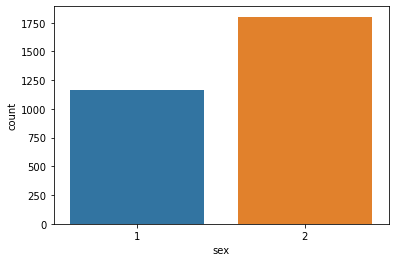

In [14]:
sns.countplot(data=df,x='sex')

berdasarkan plot diatas, pengguna credit card lebih banyak perempuan daripada laki-laki

<AxesSubplot:xlabel='education_level', ylabel='count'>

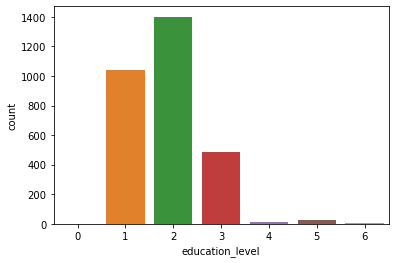

In [15]:

sns.countplot(data=df,x='education_level')

berdasarkan plot diatas, pengguna credit card lebih banyak lulusan university

<AxesSubplot:xlabel='marital_status', ylabel='count'>

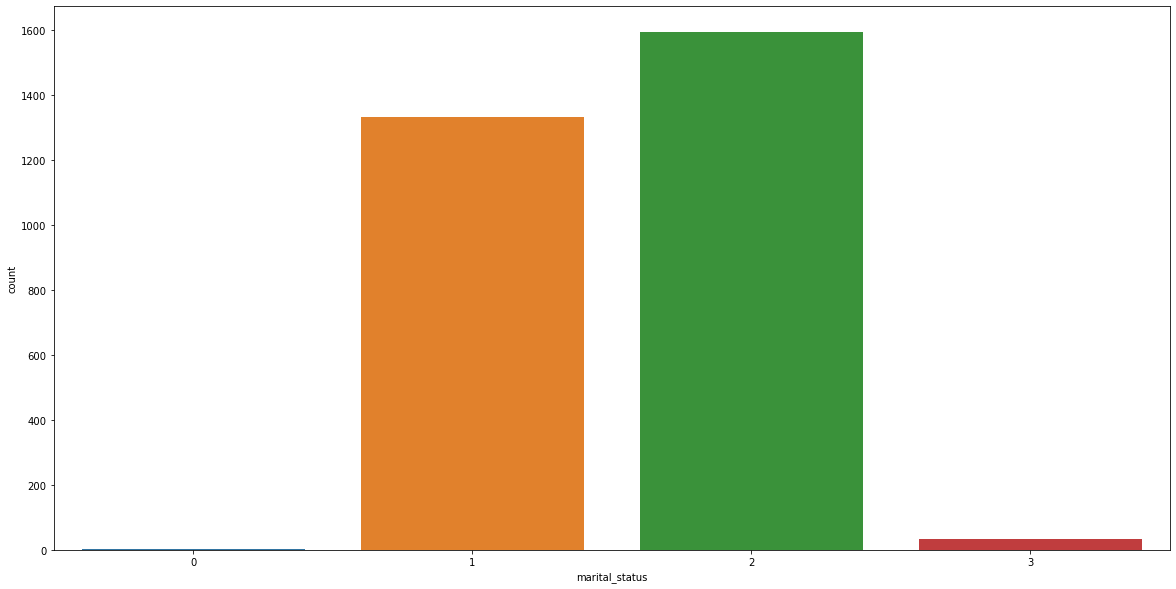

In [16]:
plt.figure(figsize=(20,10))
sns.countplot(data=df, x='marital_status')

berdasarkan plot diatas, pengguna credit card lebih banyak single

In [17]:
df.groupby('education_level')['sex'].value_counts()

education_level  sex
0                1        2
1                2      631
                 1      408
2                2      858
                 1      542
3                2      296
                 1      187
4                2        7
                 1        6
5                1       15
                 2        9
6                1        3
                 2        1
Name: sex, dtype: int64

In [18]:
df.groupby('marital_status')['sex'].value_counts()

marital_status  sex
0               2        3
                1        1
1               2      818
                1      514
2               2      959
                1      635
3               2       22
                1       13
Name: sex, dtype: int64

seperti yang sudah diasumsikan sebelumnya. lebih banyak perempuan single yang menggunakan credit card

<AxesSubplot:>

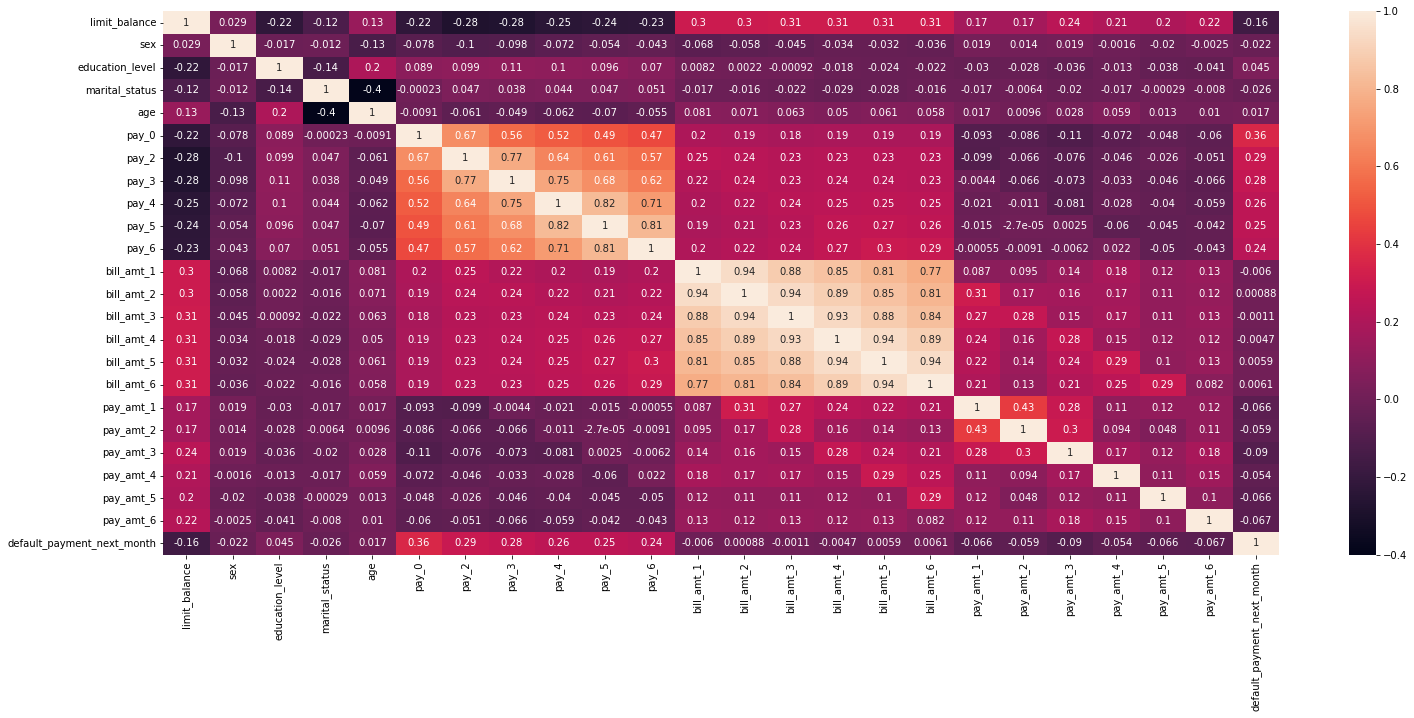

In [19]:
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(),annot=True)

berdasarkan hasil heatmap, terlihat bahwa pay, bill amt, dan pay amt saling berkolerasi. sehingga berdasarkan data tersebut akan kami lakukan prediksi modeling.

# Data Preprocessing

In [20]:
# Get Data Inference
df_inf = df.sample(20, random_state=500)

# Reset index
df_real = df.drop(df_inf.index)
df_real.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)

In [21]:
# drop columns from data inference
dfinf = df_inf.drop(['limit_balance','sex','education_level','marital_status','age','default_payment_next_month'], axis=1)
## untuk membuat prediksi harus disamakan columnya seperti model

In [22]:
X = df_real.drop(['limit_balance','sex','education_level','marital_status','age','default_payment_next_month'], axis=1)
y = df_real['default_payment_next_month']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

In [24]:
X_train.isnull().sum()

pay_0         0
pay_2         0
pay_3         0
pay_4         0
pay_5         0
pay_6         0
bill_amt_1    0
bill_amt_2    0
bill_amt_3    0
bill_amt_4    0
bill_amt_5    0
bill_amt_6    0
pay_amt_1     0
pay_amt_2     0
pay_amt_3     0
pay_amt_4     0
pay_amt_5     0
pay_amt_6     0
dtype: int64

In [25]:
X_test.isnull().sum()

pay_0         0
pay_2         0
pay_3         0
pay_4         0
pay_5         0
pay_6         0
bill_amt_1    0
bill_amt_2    0
bill_amt_3    0
bill_amt_4    0
bill_amt_5    0
bill_amt_6    0
pay_amt_1     0
pay_amt_2     0
pay_amt_3     0
pay_amt_4     0
pay_amt_5     0
pay_amt_6     0
dtype: int64

In [26]:
y_train.isnull().sum()

0

In [27]:
y_test.isnull().sum()

0

In [28]:
scaler = MinMaxScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# Model Definition, Model Training, Model Evaluation & Model Inference

## Logistic Regression

In [29]:
log_model = LogisticRegression()
log_model.fit(X_train_scaler,y_train)

LogisticRegression()

In [30]:
y_train_predlog = log_model.predict(X_train_scaler)
y_test_predlog = log_model.predict(X_test_scaler)

In [31]:
print('Accuracy Score Train : ', accuracy_score(y_train,y_train_predlog))
print('Accuracy Score Test : ',accuracy_score(y_test,y_test_predlog))

Accuracy Score Train :  0.8259762308998302
Accuracy Score Test :  0.8081494057724957


ini berarti bahwa akurasi pada logistic regression adalah 0.82 atau 82% dengan tingkat kesalahan 18%

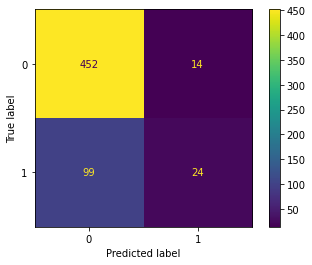

In [96]:
cm1 = confusion_matrix(y_test,y_test_predlog, labels=log_model.classes_)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=log_model.classes_)

disp1.plot()
plt.show()

berdasarkan hasil confusionn matrix, logistic regression model berhasil memprediksi 452 benar dan 24 prediksi salah. serta sebanyak false positive yang seharusnya negatif sebanyak 14 dan false negative yang seharusnya positif sebesar 99

In [33]:
print(classification_report(y_test,y_test_predlog))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89       466
           1       0.63      0.20      0.30       123

    accuracy                           0.81       589
   macro avg       0.73      0.58      0.59       589
weighted avg       0.78      0.81      0.77       589



karena nilai f1-score nya menjauh dari 0 yakni 0.89 maka dapat dikatakan bahwa model ini baik dalam memprediksi. dengan nilai recall sebesar 0.97 yang artinya kasus pada model ini diklasifikasikan dengan benar ada 97% sedangkan untuk nilai precision sebesar 0.82 yang artinya kasus pada model ini diklasifikasikan positif ada 82%

### Cross Validation

In [34]:
scores_log = cross_val_score(log_model, X_train_scaler, y_train, cv=10)
print('Cross-Validation Accuracy Scores : ', scores_log)

Cross-Validation Accuracy Scores :  [0.81355932 0.8220339  0.80508475 0.80508475 0.84322034 0.83474576
 0.84680851 0.81702128 0.83829787 0.8212766 ]


In [35]:
scores_log_final = pd.Series(scores_log)
scores_log_final.min(),scores_log_final.mean(),scores_log_final.max()

(0.8050847457627118, 0.824713306887847, 0.8468085106382979)

hasil accuracy dari cross validation, nilai rata-ratanya sebesar 0.824713306887847. tidak berbeda secara signifikan jika di bandingkan dengan accuracy prediksi log model

### GridSearch

In [36]:
penalty = ['elasticnet', 'none']
C = np.logspace(1,5,15)

hyperparameters = dict(penalty=penalty, C=C)
clf_log = GridSearchCV(log_model, hyperparameters, cv=10)

bestmodel_log = clf_log.fit(X_train, y_train)

c:\Users\annes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\annes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\annes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\annes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore

In [37]:
print('Best Penalty : ', bestmodel_log.best_estimator_.get_params())
print('Best C : ', bestmodel_log.best_estimator_.get_params()['C'])

ypred_bestmodel = bestmodel_log.predict(X_test)

print(classification_report(y_test,ypred_bestmodel))

Best Penalty :  {'C': 10.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'none', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Best C :  10.0
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       466
           1       0.60      0.02      0.05       123

    accuracy                           0.79       589
   macro avg       0.70      0.51      0.47       589
weighted avg       0.75      0.79      0.71       589



setelah di gridsearch, terlihat nilai accuracy sebesar 0.79 atau 79% dengan tingkat kesalahan 21%.

jika di bandingkan dengan logistic regression sebelum di grid, lebih bagus prediksi sebelum dilakukannya gridsearch

### Model Inference Logistic Regression

In [38]:
dfinf_log_scaler = scaler.transform(dfinf)

In [39]:
dfinf_log_pred = log_model.predict(dfinf_log_scaler)
print('Logistic Regression Model Prediction : ', dfinf_log_pred)

Logistic Regression Model Prediction :  [0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0]


In [40]:
# membuat dataframe prediksi
dfinf_logpred = pd.DataFrame(dfinf_log_pred, columns=['Prediciton'])

# menggabungkan data asli dan prediksi
dfinf_log = pd.concat([(df_inf['default_payment_next_month']),(dfinf_logpred)], axis=1)
dfinf_log

,default_payment_next_month,Prediciton
0,0,0
1,1,1
2,1,0
3,0,0
4,0,0
5,0,0
6,1,1
7,0,0
8,1,0
9,1,0


0 for NO

1 for YES

---

dari hasil prediksi terlihat bahwa 3 prediksi yang harus membayar pembayaran credit card untuk next month. yang artinya loristic reggresion model cukup baik dalam memprediksi data

## SVM

In [41]:
clfsvm = SVC(kernel='linear')
clfsvm.fit(X_train_scaler,y_train)

SVC(kernel='linear')

In [42]:
y_train_predsvm = clfsvm.predict(X_train_scaler)
y_test_predsvm = clfsvm.predict(X_test_scaler)

print('Accuracy Score Train : ',accuracy_score(y_train, y_train_predsvm))
print('Accuracy Score Test : ',accuracy_score(y_test,y_test_predsvm))

Accuracy Score Train :  0.8306451612903226
Accuracy Score Test :  0.8149405772495756


ini berarti bahwa akurasi pada SVM adalah 0.83 atau 83% dengan tingkat kesalahan 17%

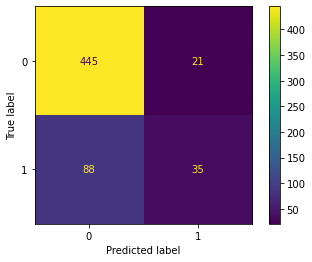

In [97]:
cm2 = confusion_matrix(y_test,y_test_predsvm, labels=clfsvm.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=clfsvm.classes_)

disp2.plot()
plt.show()

berdasarkan hasil confusionn matrix, logistic regression model berhasil memprediksi 445 benar dan 35 prediksi salah. serta sebanyak false positive yang seharusnya negatif sebanyak 21 dan false negative yang seharusnya positif sebesar 88

In [43]:
print(classification_report(y_test, y_test_predsvm))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       466
           1       0.62      0.28      0.39       123

    accuracy                           0.81       589
   macro avg       0.73      0.62      0.64       589
weighted avg       0.79      0.81      0.79       589



karena nilai f1-score nya menjauh dari 0 yakni 0.89 maka dapat dikatakan bahwa model ini baik dalam memprediksi. dengan nilai recall sebesar 0.95 yang artinya kasus pada model ini diklasifikasikan dengan benar ada 95% sedangkan untuk nilai precision sebesar 0.83 yang artinya kasus pada model ini diklasifikasikan positif ada 83%

### GridSearch

In [44]:
param_svm = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
grid_svm = GridSearchCV(SVC(), param_svm, refit = True, verbose = 3)
grid_svm.fit(X_train,y_train)
 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.786 total time=   0.4s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.786 total time=   0.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.786 total time=   0.4s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.786 total time=   0.4s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.786 total time=   0.3s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.786 total time=   0.3s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.786 total time=   0.4s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.786 total time=   0.3s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.786 total time=   0.3s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.786 total time=   0.3s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.786 total time=   0.4s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [45]:
print(grid_svm.best_params_)

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}


In [46]:
print(grid_svm.best_estimator_)

SVC(C=1, gamma=0.0001)


In [47]:
ypred_bestmodel_svm = grid_svm.predict(X_test)

print(classification_report(y_test,ypred_bestmodel_svm))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       466
           1       0.00      0.00      0.00       123

    accuracy                           0.79       589
   macro avg       0.40      0.50      0.44       589
weighted avg       0.63      0.79      0.70       589



setelah di gridsearch, terlihat nilai accuracy sebesar 0.79 atau 79% dengan tingkat kesalahan 21%.

jika di bandingkan dengan SVM sebelum di grid, lebih bagus prediksi sebelum dilakukannya gridsearch

## Decision Tree

In [48]:
dt = DecisionTreeClassifier(max_depth=2, random_state=50)

In [49]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=50)

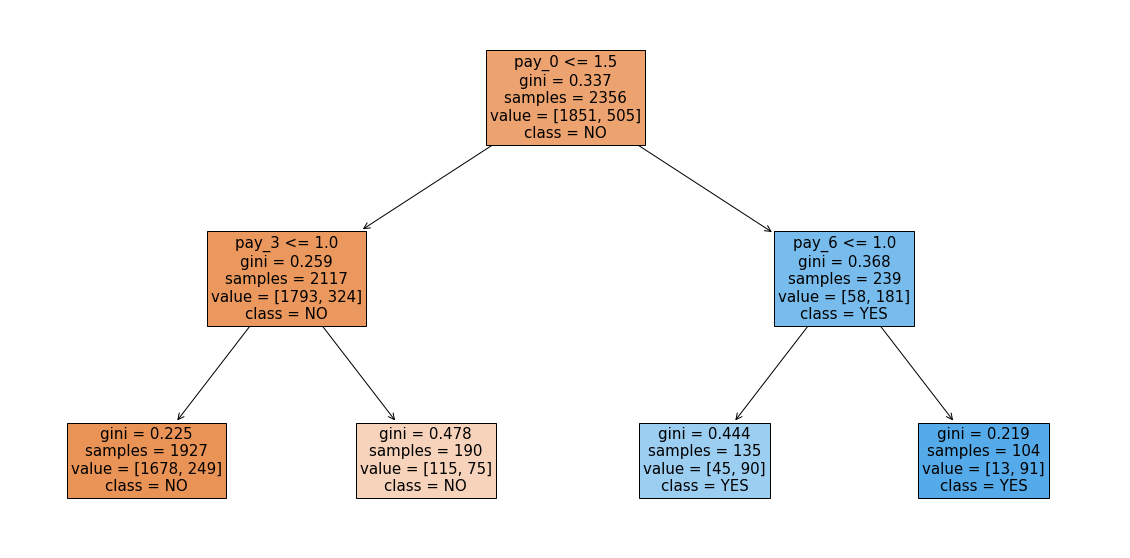

In [50]:
plt.figure(figsize=(20,10))
tree.plot_tree(dt,feature_names=X.columns, class_names=['NO','YES'], filled=True, fontsize=15)
plt.show()

In [51]:
dt_pred_train = dt.predict(X_train)
print('Accuracy Score Decision Tree : ',accuracy_score(y_train, dt_pred_train))

Accuracy Score Decision Tree :  0.8378607809847198


ini berarti nilai akurasi decision tree sebesar 0.83% atau 83% dengan kesalahan sebesar 17%

In [52]:
print(classification_report(y_train,dt_pred_train))

              precision    recall  f1-score   support

           0       0.85      0.97      0.90      1851
           1       0.76      0.36      0.49       505

    accuracy                           0.84      2356
   macro avg       0.80      0.66      0.70      2356
weighted avg       0.83      0.84      0.81      2356



karena nilai f1-score nya menjauh dari 0 yakni 0.90 maka dapat dikatakan bahwa model ini baik dalam memprediksi. dengan nilai recall sebesar 0.97 yang artinya kasus pada model ini diklasifikasikan dengan benar ada 97% sedangkan untuk nilai precision sebesar 0.85 yang artinya kasus pada model ini diklasifikasikan positif ada 85%

In [53]:
print('training set score:', dt.score(X_train, y_train))
print('validation set score:', dt.score(X_test, y_test))

training set score: 0.8378607809847198
validation set score: 0.8268251273344652


berdasarkan hasil training set dan validation set, terlihat bahwa kedua set tersebut ideal untuk membandingkan model yang berbeda. karena hasil kedua score tersebut tidak berbeda jauh

### GridSearch

In [54]:
dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(2,9),
    'min_samples_split': np.arange(2,9)
}
dt= DecisionTreeClassifier(random_state=1)
dt_grid = GridSearchCV(dt, dt_params, cv=10, scoring='accuracy', return_train_score=True)
dt_grid.fit(X_train,y_train)


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8])},
             return_train_score=True, scoring='accuracy')

In [55]:
print('best params:', dt_grid.best_params_)
print('best score:', dt_grid.best_score_)

best params: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 2}
best score: 0.8378723404255319


menurut hasil tersebut, best score untuk decision tree sebesar 0.84

In [56]:
dt_best = dt_grid.best_estimator_
print(dt_best)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)


In [57]:
dt_train_p = dt_best.predict(X_train)
dt_val_p = dt_best.predict(X_test)

In [58]:
print(classification_report(y_train,dt_train_p))

              precision    recall  f1-score   support

           0       0.85      0.97      0.90      1851
           1       0.76      0.36      0.49       505

    accuracy                           0.84      2356
   macro avg       0.80      0.66      0.70      2356
weighted avg       0.83      0.84      0.81      2356



setelah di gridsearch, terlihat nilai accuracy sebesar 0.84 atau 84% dengan tingkat kesalahan 16%.

jika di bandingkan dengan decision tree sebelum di grid, menunjukan hasil yang sama, yang artinya model yang di buat oleh decision tree sebelum dilakukan gridsearch sudah menggunakan parameter yang baik untuk memprediksi

### Model Inference Decision Tree

In [59]:
print(X.isin(X))

      pay_0  pay_2  pay_3  pay_4  pay_5  pay_6  bill_amt_1  bill_amt_2  \
0      True   True   True   True   True   True        True        True   
1      True   True   True   True   True   True        True        True   
2      True   True   True   True   True   True        True        True   
3      True   True   True   True   True   True        True        True   
4      True   True   True   True   True   True        True        True   
...     ...    ...    ...    ...    ...    ...         ...         ...   
2940   True   True   True   True   True   True        True        True   
2941   True   True   True   True   True   True        True        True   
2942   True   True   True   True   True   True        True        True   
2943   True   True   True   True   True   True        True        True   
2944   True   True   True   True   True   True        True        True   

      bill_amt_3  bill_amt_4  bill_amt_5  bill_amt_6  pay_amt_1  pay_amt_2  \
0           True        True     

In [60]:
dt_dfinf_pred = dt_best.predict(dfinf)

In [61]:
# membuat dataframe prediksi
dfinf_dt_pred = pd.DataFrame(dt_dfinf_pred, columns=['Prediciton'])

# menggabungkan data asli dan prediksi
dfinf_dtpred = pd.concat([(df_inf['default_payment_next_month']),(dfinf_dt_pred)], axis=1)
dfinf_dtpred

,default_payment_next_month,Prediciton
0,0,0
1,1,1
2,1,0
3,0,0
4,0,0
5,0,0
6,1,1
7,0,0
8,1,0
9,1,1


dari hasil prediksi terlihat bahwa 3 prediksi yang harus membayar pembayaran credit card untuk next month. yang artinya decision tree model cukup baik dalam memprediksi data

## Random Forest

In [62]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(max_features='sqrt', max_leaf_nodes=10),
    n_estimators=100, random_state=50)

bag_clf.fit(X_train,y_train)
bag_y_pred = bag_clf.predict(X_test)

In [63]:
rnd_clf = RandomForestClassifier(n_estimators=100, max_leaf_nodes=10, random_state=50)
rnd_clf.fit(X_train,y_train)

rnd_y_pred = rnd_clf.predict(X_test)

In [64]:
np.sum(bag_y_pred == rnd_y_pred) / len(bag_y_pred)

0.9762308998302207

penerapan bagging di decision tree similar dengan random forest

In [65]:
print('Accuracy Random Forest : ', accuracy_score(y_test,rnd_y_pred))

Accuracy Random Forest :  0.8251273344651953


ini berarti nilai akurasi random forest sebesar 0.82% atau 82% dengan kesalahan sebesar 18%

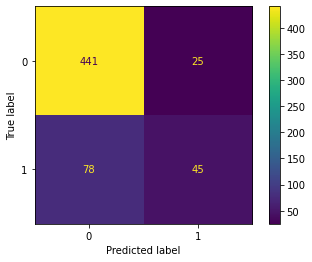

In [99]:
cm3 = confusion_matrix(y_test,rnd_y_pred, labels=rnd_clf.classes_)
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=rnd_clf.classes_)

disp3.plot()
plt.show()

berdasarkan hasil confusionn matrix, logistic regression model berhasil memprediksi 441 benar dan 45 prediksi salah. serta sebanyak false positive yang seharusnya negatif sebanyak 25 dan false negative yang seharusnya positif sebesar 78

In [66]:
print(classification_report(y_test, rnd_y_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       466
           1       0.64      0.37      0.47       123

    accuracy                           0.83       589
   macro avg       0.75      0.66      0.68       589
weighted avg       0.81      0.83      0.81       589



karena nilai akurasi f1-score nya menjauh dari 0 yakni, 0.90 maka dapat dikatakan bahwa model ini baik dalam memprediksi. dengan nilai recall sebesar 0.95 yang artinya kasus pada model ini diklasifikasikan dengan benar ada 95% sedangkan untuk nilai precision sebesar 0.85 yang artinya kasus pada model ini diklasifikasikan positif ada 85%

In [67]:
rnd_clf.feature_importances_

array([0.37485864, 0.15382904, 0.08759246, 0.09697783, 0.06773148,
       0.05801515, 0.00704886, 0.01339938, 0.00781049, 0.00994925,
       0.00936881, 0.00884017, 0.02390376, 0.02065988, 0.01033947,
       0.01571028, 0.01008374, 0.02388131])

In [68]:
scores_rnd_final = pd.Series(rnd_clf.feature_importances_)
scores_rnd_final.min(),scores_rnd_final.mean(),scores_rnd_final.max()

(0.007048861041487224, 0.055555555555555566, 0.37485864216953185)

berdasarkan hasil tersebut. feature importance (mengukur pengingkatan kesalahan prediksi model) rata-ratanya sebesar 0.055555555555555566 dengan nilai terrendah 0.007048861041487224

### Model Inference Random Forest

In [69]:
dfinf_rnd_clf = rnd_clf.predict(dfinf)

In [70]:
# membuat dataframe prediksi
dfinf_rnd_pred = pd.DataFrame(dfinf_rnd_clf, columns=['Prediciton'])

# menggabungkan data asli dan prediksi
dfinf_rndpred = pd.concat([(df_inf['default_payment_next_month']),(dfinf_rnd_pred)], axis=1)
dfinf_rndpred

,default_payment_next_month,Prediciton
0,0,0
1,1,1
2,1,0
3,0,0
4,0,0
5,0,0
6,1,1
7,0,0
8,1,0
9,1,1


dari hasil prediksi terlihat bahwa 4 prediksi yang harus membayar pembayaran credit card untuk next month. yang artinya random forest model cukup baik dalam memprediksi data

## KNN (K-Nearest Neighbors)

In [71]:
knn = KNeighborsClassifier(n_neighbors=5)

In [72]:
knn.fit(X_train_scaler,y_train)

KNeighborsClassifier()

In [73]:
knn_ypred = knn.predict(X_test_scaler)
print('Accuracy KNN Model : ', accuracy_score(y_test,knn_ypred))

Accuracy KNN Model :  0.7809847198641766


ini berarti nilai akurasi random forest sebesar 0.78% atau 78% dengan kesalahan sebesar 22%

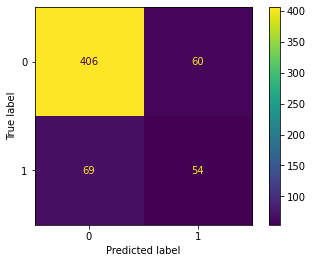

In [101]:
cm4 = confusion_matrix(y_test,knn_ypred, labels=knn.classes_)
disp4 = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=knn.classes_)

disp4.plot()
plt.show()

berdasarkan hasil confusionn matrix, logistic regression model berhasil memprediksi 406 benar dan 54 prediksi salah. serta sebanyak false positive yang seharusnya negatif sebanyak 60 dan false negative yang seharusnya positif sebesar 69

In [74]:
print(classification_report(knn_ypred, y_test))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       475
           1       0.44      0.47      0.46       114

    accuracy                           0.78       589
   macro avg       0.66      0.66      0.66       589
weighted avg       0.79      0.78      0.78       589



karena nilai akurasi f1-score nya agak menjauh dari 0 yakni 0.86 maka dapat dikatakan bahwa model ini kurang baik dalam memprediksi. dengan nilai recall sebesar 0.85 yang artinya kasus pada model ini diklasifikasikan dengan benar ada 85% sedangkan untuk nilai precision sebesar 0.87 yang artinya kasus pada model ini diklasifikasikan positif ada 87%

In [75]:
# save model
with open ('model_knn.pkl', 'wb') as model_knn:
    pickle.dump(knn, model_knn)

In [76]:
# loop k dan train masing-masing k
max_k = 20
training = []
testing = []
for k in range(1, max_k+1):
    knn_loop = KNeighborsClassifier(n_neighbors=k)

knn_loop.fit(X_train_scaler,y_train)

score_training = knn_loop.score(X_train_scaler, y_train)
training.append(score_training)

score_testing = knn_loop.score(X_test_scaler, y_test)
testing.append(score_testing)

In [77]:
knn_df = pd.DataFrame({'training': training, 'testing':testing})
knn_df

,training,testing
0,0.832343,0.820034


### GridSearch

In [78]:
k_range = list(range(1,21))
param_knn = dict(n_neighbors=k_range)

grid_knn = GridSearchCV(knn,param_knn, cv=10, scoring='accuracy', return_train_score=False, verbose=1)

grid_knn_search = grid_knn.fit(X_train,y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


In [79]:
print(grid_knn_search.best_params_)

{'n_neighbors': 16}


In [80]:
accuracy = grid_knn_search.best_score_*100
print("Accuracy for Training Dataset With Tuning:  {:.2f}%".format(accuracy))

Accuracy for Training Dataset With Tuning:  78.18%


walaupun sudah dilakukan hyperparameter tuning dengan melakukan gridsearch tetap saja KNN model kurang baik dalam memprediksi.

karena hasilnya sebelum dan sesudah gridsearch sama, yakni 78%

### Model Inference KNN

In [81]:
dfinf_knn = knn.predict(dfinf)

# membuat dataframe prediksi
dfinf_knn_pred = pd.DataFrame(dfinf_knn, columns=['Prediciton'])

# menggabungkan data asli dan prediksi
dfinf_knnpred = pd.concat([(df_inf['default_payment_next_month']),(dfinf_knn_pred)], axis=1)
dfinf_knnpred

c:\Users\annes\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


,default_payment_next_month,Prediciton
0,0,0
1,1,0
2,1,0
3,0,0
4,0,0
5,0,0
6,1,0
7,0,0
8,1,0
9,1,0


berdasarkan hasil diatas, saat dilakukan untuk model inference, KNN model tidak dapat memprediksi dengan baik. sehingga tidak ada pembayaran kartu kredit untuk bulan berikutnya.

terlihat di columns prediction tidak ada yang harus membayar payment next month. yang artinya KNN model tidak cukup baik untuk memprediksi sebuah model.

## Naive Bayes

In [82]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

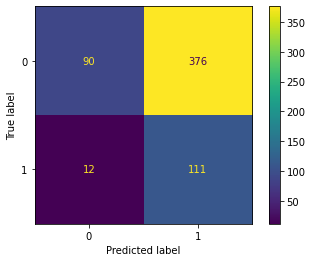

In [102]:
cm5 = confusion_matrix(y_test,nb_y_pred, labels=nb.classes_)
disp5 = ConfusionMatrixDisplay(confusion_matrix=cm5, display_labels=nb.classes_)

disp5.plot()
plt.show()

berdasarkan hasil confusionn matrix, logistic regression model berhasil memprediksi 90 benar dan 111 prediksi salah. serta sebanyak false positive yang seharusnya negatif sebanyak 376 dan false negative yang seharusnya positif sebesar 12

In [83]:
nb_y_pred = nb.predict(X_test)
print(classification_report(y_test,nb_y_pred))

              precision    recall  f1-score   support

           0       0.88      0.19      0.32       466
           1       0.23      0.90      0.36       123

    accuracy                           0.34       589
   macro avg       0.56      0.55      0.34       589
weighted avg       0.75      0.34      0.33       589



karena nilai akurasi f1-score nya mendekati dari 0 yakni 0.32 maka dapat dikatakan bahwa model ini tidak bisa untuk memprediksi suatu data. dengan nilai recall sebesar 0.19 yang artinya kasus pada model ini diklasifikasikan dengan benar ada 19% sedangkan untuk nilai precision sebesar 0.88 yang artinya kasus pada model ini diklasifikasikan positif ada 88%

In [84]:
nb.predict_proba(X_test)[:5]

array([[0.04236239, 0.95763761],
       [0.02315583, 0.97684417],
       [0.00781532, 0.99218468],
       [0.01434138, 0.98565862],
       [0.02377448, 0.97622552]])

### Model Inference Naive Bayes

In [85]:
dfinf_nb = nb.predict(dfinf)

# membuat dataframe prediksi
dfinf_nb_pred = pd.DataFrame(dfinf_nb, columns=['Prediciton'])

# menggabungkan data asli dan prediksi
dfinf_nbpred = pd.concat([(df_inf['default_payment_next_month']),(dfinf_nb_pred)], axis=1)
dfinf_nbpred

,default_payment_next_month,Prediciton
0,0,1
1,1,1
2,1,1
3,0,1
4,0,1
5,0,1
6,1,1
7,0,0
8,1,1
9,1,1


berdasarkan hasil diatas, terlihat di columns prediction banyak sekali data yang kurang akurat yang artinya naive bayes model tidak bisa untuk memprediksi sebuah model data ini

## Other Algorithm (Voting Ensemble)

### Hard Voting

Memprediksi kelas dengan jumlah vote terbesar

In [86]:
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)

voting_clf_hard = VotingClassifier(
    estimators=[('lr', log_clf), ('svc', svm_clf)],
    voting='hard')

In [87]:
voting_clf_hard.fit(X_train,y_train)

c:\Users\annes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [88]:
for clf in (log_clf, svm_clf, voting_clf_hard):
    clf.fit(X_train,y_train)
    vote_hard_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test,vote_hard_pred))

c:\Users\annes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression 0.7911714770797963
SVC 0.7911714770797963


c:\Users\annes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier 0.7911714770797963


LogisticRegression 0.7911714770797963

SVC 0.7911714770797963

VotingClassifier 0.7928692699490663

berdasarkan hasil hard voting, dengan mengambil jumlah vote terbesar, menurut hard vote,

logistic regression, SVM, dan Voting Classifier mempunyai accuracy sebesar 0.79 atau 79% dengan kesalahan 21%

yang berarti hard voting ini cukup baik untuk memprediksi data ini. dengan mengambil jumlah vote terbesar, model ini cukup baik untuk memprediksi

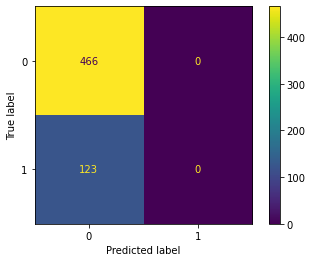

In [103]:
cm6 = confusion_matrix(y_test,vote_hard_pred, labels=voting_clf_hard.classes_)
disp6 = ConfusionMatrixDisplay(confusion_matrix=cm6, display_labels=voting_clf_hard.classes_)

disp6.plot()
plt.show()

berdasarkan hasil confusionn matrix, logistic regression model berhasil memprediksi 466 benar dan 0 prediksi salah. serta sebanyak false positive yang seharusnya negatif sebanyak 0 dan false negative yang seharusnya positif sebesar 123

In [89]:
print(classification_report(y_test,vote_hard_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       466
           1       0.00      0.00      0.00       123

    accuracy                           0.79       589
   macro avg       0.40      0.50      0.44       589
weighted avg       0.63      0.79      0.70       589



c:\Users\annes\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\annes\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\annes\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


karena f1-score menjauh dari 0 yakni 0.88 maka model ini cukup baik dalam memprediksi data ini. dengan nilai recall sebesar 1.00 yang artinya kasus pada model ini diklasifikasikan dengan benar ada 100% sedangkan untuk nilai precision sebesar 0.79 yang artinya kasus pada model ini diklasifikasikan positif ada 79%

### Cross Validation

In [90]:
print('lr cross_val_score:' + str(cross_val_score(log_clf, X_train, y_train, scoring='accuracy', cv=10).mean()))
print('svc cross_val_score:' + str(cross_val_score(svm_clf, X_train, y_train, scoring='accuracy', cv=10).mean()))

c:\Users\annes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\annes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

lr cross_val_score:0.7962567616300036
svc cross_val_score:0.7852326000721241


lr cross_val_score:0.7962567616300036

svc cross_val_score:0.7852326000721241

nilai setelah dan sebelum lakukannya cross validation tida berbeda secara signifikan yang artinya data tersebut sebelum dilakukan cross-val sudah cukup baik untuk dilakukan prediksi

### GridSearch

In [91]:
eclf = VotingClassifier(estimators=[ 
    ('svm', SVC(probability=True)),
    ('lr', LogisticRegression()),
    ], voting='hard')

In [92]:
param_vote = {'lr__C': [1.0, 100.0],
      'svm__C': [2,3,4],}
grid_vote = GridSearchCV(estimator=eclf, param_grid=param_vote, cv=3)
grid_vote.fit(X_train,y_train)

c:\Users\annes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\annes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=3,
             estimator=VotingClassifier(estimators=[('svm',
                                                     SVC(probability=True)),
                                                    ('lr',
                                                     LogisticRegression())]),
             param_grid={'lr__C': [1.0, 100.0], 'svm__C': [2, 3, 4]})

In [93]:
print(grid_vote.best_params_)

{'lr__C': 1.0, 'svm__C': 3}


In [94]:
print('vc cross_val_score with GridSearch:' + str(cross_val_score(grid_vote, X_train,y_train, scoring='accuracy', cv=10).mean()))

c:\Users\annes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\annes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

vc cross_val_score with GridSearch:0.7856563288856835


vc cross_val_score with GridSearch:0.7856563288856835

nilai setelah dan sebelum lakukannya gridsearch tidak berbeda secara signifikan yang artinya data tersebut sebelum dilakukan gridsearch sudah cukup baik untuk dilakukan prediksi

# Model Inference Kesimpulan

Model Inference terbaik dari prediksi model yang telah saya lakukan addalah model prediksi logistic regression. dengan tingkat kesalahan hanya 0.3% dan akurasi 0.7%

In [95]:
# scaling data untuk model inference
dfinf_log_scaler = scaler.transform(dfinf)

# membuat prediski model inference
dfinf_log_pred = log_model.predict(dfinf_log_scaler)
print('Logistic Regression Model Prediction : ', dfinf_log_pred)

# membuat dataframe prediksi
dfinf_logpred = pd.DataFrame(dfinf_log_pred, columns=['Prediciton'])

# menggabungkan data asli dan prediksi
dfinf_log = pd.concat([(df_inf['default_payment_next_month']),(dfinf_logpred)], axis=1)
dfinf_log

Logistic Regression Model Prediction :  [0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0]


,default_payment_next_month,Prediciton
0,0,0
1,1,1
2,1,0
3,0,0
4,0,0
5,0,0
6,1,1
7,0,0
8,1,0
9,1,0


dari 20 data inference, hanya 3 prediski yang harus membayar pembayaran untuk bulan berikutnya. yang awalnya ada 7 yang harus membayar pembayran bulan berikutnya.

# Kesimpulan

menurut hasil EDA, pengguna creditcard lebih banyak gender perempuan dibandingkan laki-laki. dengan rata-rata umur 35 tahun, berstatus single, dengan lulusan pendidikan university.


----


dari hasil algoritma prediksi modeling, dengan hasil sebagai berikut:

1. Logistic Regression : karena nilai f1-score nya menjauh dari 0 yakni 0.89 atau 89% maka dapat dikatakan bahwa model ini baik dalam memprediksi. dengan nilai recall sebesar 0.97 yang artinya kasus pada model ini diklasifikasikan dengan benar ada 97% sedangkan untuk nilai precision sebesar 0.82 yang artinya kasus pada model ini diklasifikasikan positif ada 82%.

2. SVM : karena nilai f1-score nya menjauh dari 0 yakni 0.89 atau 89% maka dapat dikatakan bahwa model ini baik dalam memprediksi. dengan nilai recall sebesar 0.95 yang artinya kasus pada model ini diklasifikasikan dengan benar ada 95% sedangkan untuk nilai precision sebesar 0.83 yang artinya kasus pada model ini diklasifikasikan positif ada 83%.

3. Decision Tree : karena nilai f1-score nya menjauh dari 0 yakni 0.90 atau 90% maka dapat dikatakan bahwa model ini baik dalam memprediksi. dengan nilai recall sebesar 0.97 yang artinya kasus pada model ini diklasifikasikan dengan benar ada 97% sedangkan untuk nilai precision sebesar 0.85 yang artinya kasus pada model ini diklasifikasikan positif ada 85%.

4. Random Forest : karena nilai akurasi f1-score nya menjauh dari 0 yakni, 0.90 atau 90% maka dapat dikatakan bahwa model ini baik dalam memprediksi. dengan nilai recall sebesar 0.95 yang artinya kasus pada model ini diklasifikasikan dengan benar ada 95% sedangkan untuk nilai precision sebesar 0.85 yang artinya kasus pada model ini diklasifikasikan positif ada 85%.

5. KNN : karena nilai akurasi f1-score nya agak menjauh dari 0 yakni 0.86 atau 86% maka dapat dikatakan bahwa model ini kurang baik dalam memprediksi. dengan nilai recall sebesar 0.85 yang artinya kasus pada model ini diklasifikasikan dengan benar ada 85% sedangkan untuk nilai precision sebesar 0.87 yang artinya kasus pada model ini diklasifikasikan positif ada 87%.

6. Naive Bayes : karena nilai akurasi f1-score nya mendekati dari 0 yakni 0.32 atau 32% maka dapat dikatakan bahwa model ini tidak bisa untuk memprediksi suatu data. dengan nilai recall sebesar 0.19 yang artinya kasus pada model ini diklasifikasikan dengan benar ada 19% sedangkan untuk nilai precision sebesar 0.88 yang artinya kasus pada model ini diklasifikasikan positif ada 88%

7. Other Algorithm (Voting Classifier Hard Vote) : karena f1-score menjauh dari 0 yakni 0.88 atau 88% maka model ini cukup baik dalam memprediksi data ini. dengan nilai recall sebesar 1.00 yang artinya kasus pada model ini diklasifikasikan dengan benar ada 100% sedangkan untuk nilai precision sebesar 0.79 yang artinya kasus pada model ini diklasifikasikan positif ada 79%



----


walaupun pada hard voting terdapat nilai recall atau nilai yang benar benar positif sebesar 1.00 atau 100%, kami bisa dibilang tidak sepenuhnya percaya akan hal tersebut karena tidak ada sebuah hasil pengolahan prediski yang sempurna, pasti ada praduga atau prediksi yang salah sehingga kami tidak sepenuhnya percaya pada prediksi tersebut.


----


berdasarkan hasil dari nilai accuracy model, yang tidak bagus untuk memprediksi data ini adalah NAIVE BAYES dengan tingkat kesalahan hingga 66%.

dan model prediksi yang bagus menngunakan Decision Tree dengan hasil yang sama dengan tingkat kesalahan hanya sebesar 16%.


----


dari beberapa model prediksi yang dilakukan GridSearch, menunjukan hasilnya tidak jauh berbeda atau tidak berbeda secara signifikan dengan hasil model prediksi awal. yang artinya, model prediksi yang dilakukan mengginakan model asli sudah memprediksi dengan baik.


----


untuk model inference menurut saya yang peling terbaik adalah menggunakan logistic regression model. menurut data inference menghasilkan hasil prediksi 3 orang yang harus membayar pembayaran untuk bulan berikutnya yang sebelumnya diprediksi 7 orang yang harus membayar pembayaran bulan berikutnya.